<font size="+5">#09. Componentes Principales (PCA)</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> - Simplemente, copiamos y pegamos las siguientes líneas de código para cargar los datos.
> - La tabla contiene **estadísticas sobre Coches** (columnas).
> - Para distintas **Marcas/Modelos de coche** (filas).

```python
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)
```

In [2]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevette,30.5,4,98.0,63.0,2051,17.0,77,usa
chevrolet impala,13.0,8,350.0,165.0,4274,12.0,72,usa
datsun f-10 hatchback,33.5,4,85.0,70.0,1945,16.8,77,japan
mercury capri 2000,23.0,4,122.0,86.0,2220,14.0,71,usa
volkswagen rabbit,29.0,4,90.0,70.0,1937,14.0,75,europe
dodge colt hardtop,25.0,4,97.5,80.0,2126,17.0,72,usa
ford gran torino,14.0,8,302.0,137.0,4042,14.5,73,usa
chevrolet caprice classic,17.5,8,305.0,145.0,3880,12.5,77,usa
nissan stanza xe,36.0,4,120.0,88.0,2160,14.5,82,japan


# Seleccionar Todas las Variables para el Análisis de Clúster

> Todas son explicativas, por lo que `model.fit(df)`

# Escalar los Datos

> 1. Recuerda que no es lo mismo incrementar 1 kilogramo que un 1 metro de algura.
> 2. La solución está en `StandardScaler()`.

In [4]:
import pandas as pd

In [32]:
df = pd.get_dummies(df)

In [33]:
df.loc[df.isna().sum(axis=1)>0,]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
name,,,,,,,,,,


In [34]:
df = df.dropna()

In [35]:
df.loc[df.isna().sum(axis=1)>0,]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
name,,,,,,,,,,


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [37]:
dfnorm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
dfnorm.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
name,,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.458123,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.458123,-0.50239,0.774597
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.458123,-0.50239,0.774597
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.458123,-0.50239,0.774597
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.458123,-0.50239,0.774597


# Entrenar Modelo `KMeans()`

## Seleccionar Número Óptimo k de Clústers

> - Aplicar el método del codo.
> - Recuerda que este método es muy `subjetivo`.
> - Pueden haber más de 2-3 números posibles.

In [38]:
from sklearn.cluster import KMeans

In [39]:
model = KMeans(n_clusters=1)

In [40]:
model.fit(dfnorm)

KMeans(n_clusters=1)

In [41]:
model.inertia_

3919.999999999999

In [47]:
def calcular_error(n):
    model = KMeans(n_clusters=n)

    model.fit(dfnorm)

    error = model.inertia_

    return error

In [53]:
pepa = 1

In [54]:
e = calcular_error(pepa)

In [55]:
e

3919.999999999999

In [60]:
todos_errores = []

In [62]:
for pepa in [1,2,3,4,5,6,7,8,9,10]:

    e = calcular_error(pepa)

    e
    todos_errores.append(e)

In [64]:
intentos_cluster = [1,2,3,4,5,6,7,8,9,10]

In [65]:
todos_errores

[3919.999999999999,
 2186.9631261396516,
 1630.983105669787,
 1131.3292866255406,
 932.1714858974422,
 850.6452682837702,
 775.401689725416,
 706.7660348217246,
 642.771275242191,
 598.8456672831676]

<AxesSubplot:>

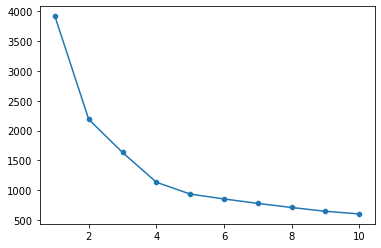

In [67]:
sns.scatterplot(x=intentos_cluster, y=todos_errores)
sns.lineplot(x=intentos_cluster, y=todos_errores)

## Entrenar Modelo con Número k de Clústers Óptimo

> `model.fit()`

In [68]:
model = KMeans(n_clusters=4)

In [69]:
model.fit(X=dfnorm)

KMeans(n_clusters=4)

# Realizar Predicciones

> - Son las mismas que `model.labels_`?

In [71]:
model_pred = model.predict(dfnorm)

In [75]:
model_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 1, 3, 3, 3, 3, 0, 1, 0, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 2, 2, 2, 1, 0, 0, 1, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 1, 0, 1, 0,
       0, 1, 1, 2, 3, 3, 2, 2, 2, 2, 3, 2, 0, 3, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 0, 0, 1, 2, 3, 2, 0, 2, 3, 3, 3, 3, 0, 1, 2, 1, 0, 3,
       1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0,
       2, 1, 0, 0, 0, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 3, 2, 1, 1, 1,

In [76]:
model.labels_ == model_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Visualizar Modelo

> - Haz un `scatterplot` con 2 variables.
> - Colorea los puntos según el grupo.
> Por qué están mezclados los grupos?
> Cómo lo solucionamos?
> - PCA. Siguiente apartado.

In [77]:
dfnorm.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
name,,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.458123,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.458123,-0.50239,0.774597
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.458123,-0.50239,0.774597
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.458123,-0.50239,0.774597
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.458123,-0.50239,0.774597


<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

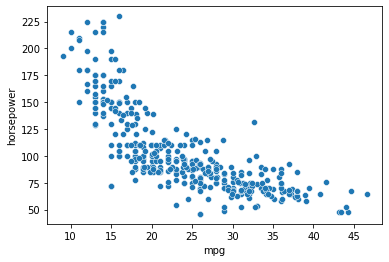

In [78]:
sns.scatterplot(x='mpg', y='horsepower', data=df)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

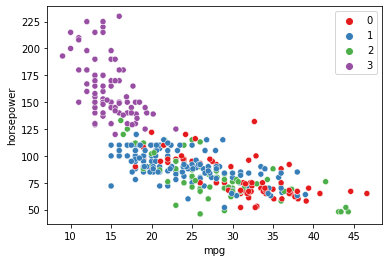

In [80]:
sns.scatterplot(x='mpg', y='horsepower', data=df, hue=model_pred, palette='Set1')

In [83]:
import plotly.express as px

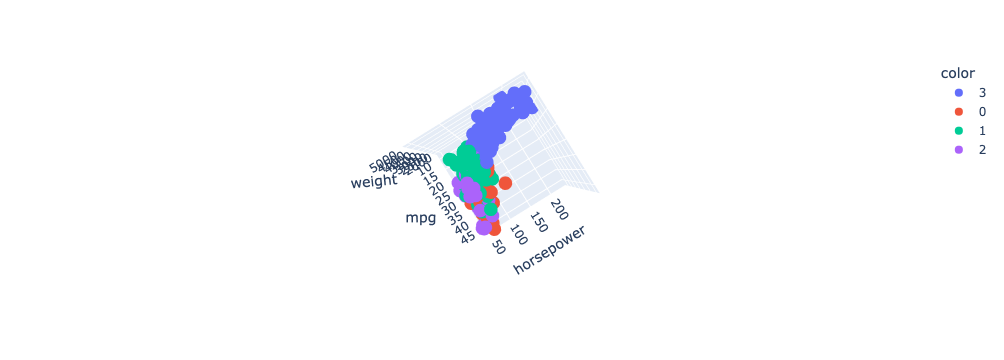

In [90]:
px.scatter_3d(x='mpg', y='horsepower', data_frame=df, z='weight', color=model_pred.astype(str))

## Agrupación de Variables en Componentes Principales con `PCA()`

> Obviamente, no vamos a poder representar más que **2 variables en un Scatterplot**. Sin embargo, nuestro Análisis de Clúster ha tenido en cuenta más de 2 variables. Por este motivo debemos **Agrupar las Variables** que más se correlacionen en otras nuevas variables: las **Componentes Principales**.
>
> - La función `fit_transform()` nos devolverá una matriz con las nuevas variables.
> - Tras obtener la matriz, vamos a representarla en un `DataFrame` con la función `pd.DataFrame(matriz)`.
> - Posteriormente renombraremos las columnas. Por ejemplo, si el `DataFrame` tiene 4 columnas, deberemos renombrarlas aplicando el siguiente código: `matriz.columns = ['PC1', 'PC2', 'PC3', 'PC4']`.

<AxesSubplot:>

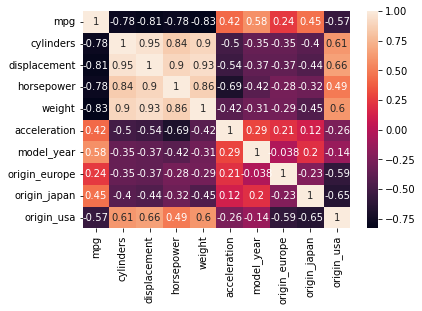

In [89]:
sns.heatmap(dfnorm.corr(),annot=True)

In [91]:
from sklearn.decomposition import PCA

pca = PCA()
dfpca = pd.DataFrame(pca.fit_transform(dfnorm), index=df.index)

pca_columns = ['PC' + str(i+1) for i in range(pca.n_components_)]
dfpca.columns = pca_columns

dfpca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
name,,,,,,,,,,
chevrolet chevelle malibu,2.801005,0.320339,0.656663,0.518870,-0.738652,0.766243,-0.476786,-0.096779,-0.120803,5.116497e-15
buick skylark 320,3.584368,0.369645,0.964884,0.282461,-0.588088,0.495804,0.004389,0.214274,0.073724,1.146165e-15
plymouth satellite,3.099742,0.307663,0.944898,0.251333,-0.963157,0.735577,-0.220338,0.142800,-0.084338,-1.450774e-15
amc rebel sst,3.049356,0.367393,0.793047,0.490174,-0.709139,0.540139,-0.237422,0.291771,-0.148300,1.341127e-15
ford torino,3.037469,0.322174,0.968737,0.272668,-1.099928,0.590524,-0.477794,-0.003369,-0.175006,4.345340e-16


## Visualizar las 2 Primeras Componentes con el Cluster

> - Eje X: `PC1`
> - Eje Y: `PC2`
> - `hue = model.labels_`
> - (Opcional) Representar los centroides. Deberíamos transformar los centroides en términos de Componentes Principales con `modelopca.transform(datos)`.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

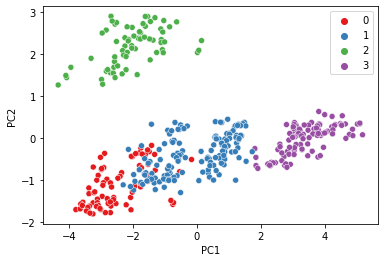

In [92]:
sns.scatterplot(x='PC1', y='PC2', data=dfpca, hue=model_pred, palette='Set1')

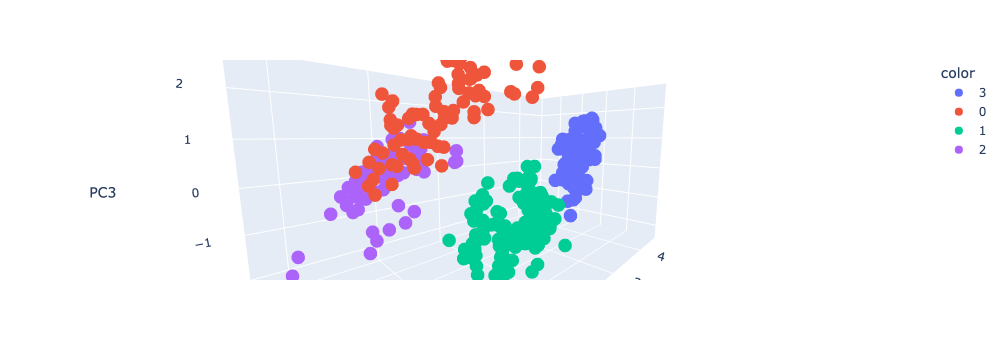

In [94]:
px.scatter_3d(x='PC1', y='PC2', data_frame=dfpca, z='PC3', color=model_pred.astype(str))

## Interpretar Visualización

> - Qué tienen que ver `PC1` Y `PC2` con las variables originales?
> - Por qué se distinguen los grupos? Uno se sitúa más a la derecha? Otro más a la izquierda? Uno más arriba o abajo? Por qué?

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] En este capítulo empezaremos a ir conectando los puntos de estadística y serás capaz de ir simplificando la gran variedad que existe en ella.
- [ ] Nos daremos cuenta de lo simple que es la estadística y que podría resumirse en la **Suma de Cuadrados**.
- [ ] Distinguir cuándo usar un modelo u otro porque no vale todo con todo. Sino que hay que ir viendo las soluciones concretas a cada necesidad.
- [ ] Entender la necesidad de **Normalizar** los datos.
- [ ] Familiarizarnos, aún más, con el término de la optimización.
- [ ] Ver de forma práctica cómo se usa el **Álgebra en Machine Learning**.